# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# import zipfile

# # Unzip the data
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## CNN Model - Multiclass Classification

### Familiarise with the data

In [2]:
# Walk through dataset directories
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data\test.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data\test\fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data\test\hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data\test\pizza.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ramen.
There are 0 directories and 250 images in 10_food_classes_all_data\test\steak.
There are 0 directories and 250 images in 10_food_classes_all_data\test\sushi.
There are 10 directories and 0 ima

In [3]:
# Setting up train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Getting the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Function to visialise random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (384, 512, 3)


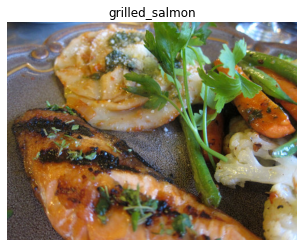

In [11]:
# Visualising random images
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)
)

### Pre-processing the data

In [14]:
# Building image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data and turn into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Creating a baseline multiclass CNN model